## **Final Submission Image Classification**
###### Nama : Zaki Anwar Farizan
###### No. Register : 1494037162101-1245

In [1]:
# Import library tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


**Import Dictionary**

In [24]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

**Mengambil Dataset**

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download puneet6060/intel-image-classification

 92% 318M/346M [00:01<00:00, 325MB/s]
100% 346M/346M [00:01<00:00, 304MB/s]


In [7]:
! unzip intel-image-classification

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [8]:
base_dir = '/content/seg_train/seg_train'
train_dir = base_dir
validation_dir = base_dir

In [9]:
# Cek Class
os.listdir('/content/seg_train/seg_train')

['sea', 'buildings', 'mountain', 'glacier', 'street', 'forest']

**Membagi Dataset menjadi Train dan Test**

In [10]:
# Augmentasi Gambar dengan ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2)

In [11]:
# Train & validation split
train = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32, 
        class_mode='categorical',
        subset='validation')

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


**Pembuatan Model**

In [12]:
# Model Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [15]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [17]:
history = model.fit(
      train,
      steps_per_epoch=30,  
      epochs=50,
      validation_data=validation, 
      validation_steps=10,
      callbacks=[callbacks])

Epoch 1/50
30/30 [==============================] - 6s 194ms/step - loss: 0.9604 - accuracy: 0.6167 - val_loss: 0.7997 - val_accuracy: 0.7094
Epoch 2/50
30/30 [==============================] - 6s 192ms/step - loss: 0.8865 - accuracy: 0.6552 - val_loss: 1.0748 - val_accuracy: 0.5813
Epoch 3/50
30/30 [==============================] - 6s 192ms/step - loss: 0.9235 - accuracy: 0.6594 - val_loss: 0.9638 - val_accuracy: 0.6156
Epoch 4/50
30/30 [==============================] - 6s 189ms/step - loss: 0.9290 - accuracy: 0.6469 - val_loss: 1.0214 - val_accuracy: 0.5906
Epoch 5/50
30/30 [==============================] - 6s 191ms/step - loss: 0.9244 - accuracy: 0.6406 - val_loss: 0.8601 - val_accuracy: 0.6781
Epoch 6/50
30/30 [==============================] - 6s 193ms/step - loss: 0.8703 - accuracy: 0.6625 - val_loss: 0.7552 - val_accuracy: 0.7281
Epoch 7/50
30/30 [==============================] - 6s 191ms/step - loss: 0.8851 - accuracy: 0.6604 - val_loss: 0.7591 - val_accuracy: 0.7437
Epoch 

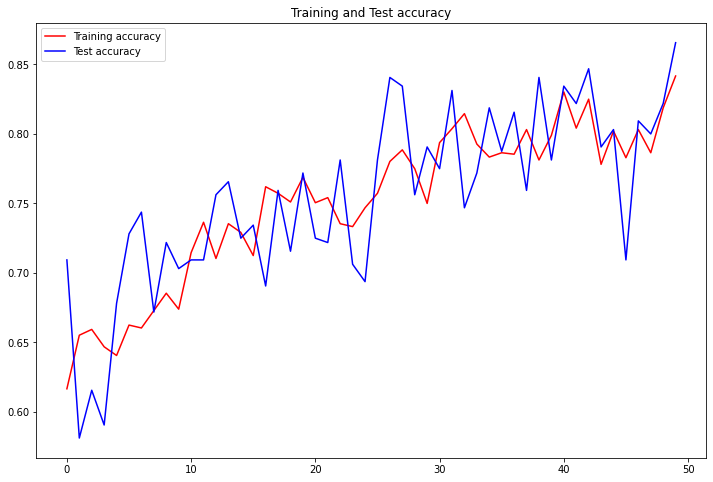

In [20]:
accur = history.history['accuracy']
val_accur = history.history['val_accuracy'] 

epochs = range(len(accur))

plt.figure(figsize=(12,8))
plt.plot(epochs, accur, 'r', label='Training accuracy')
plt.plot(epochs, val_accur, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.legend(loc=0)
plt.show()

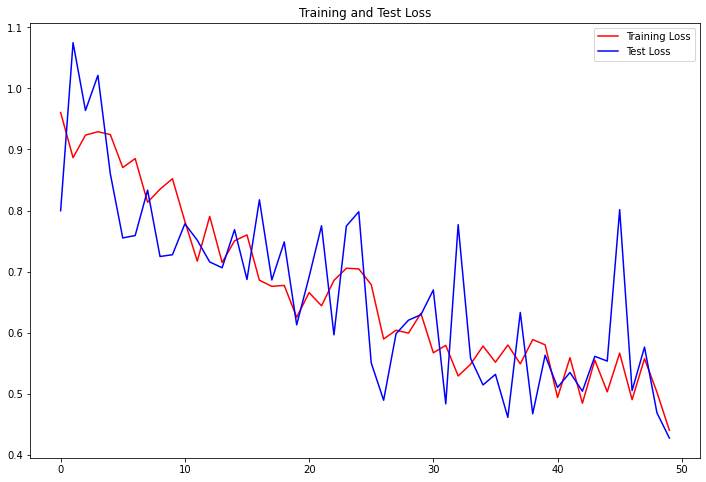

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accur))

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Test Loss')
plt.title('Training and Test Loss')
plt.legend(loc=0)
plt.show()

**Menyimpan ke tf.lite**

In [28]:
import pathlib

# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi intel_image.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('intel_image.tflite')
tflite_model_file.write_bytes(tflite_model)

22215992